In [97]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

___
# K-Means Model Training and Testing
___

### **TRAINING: K-Means on 16 Numeric Features *without* Scaling** 

In [98]:
#Read the cleaned numeric dataset csv into a dataframe 
#clean_data only contains numeric features
test_path = ("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/cleaned_numeric_dataset.csv")
clean_train = pd.read_csv(test_path)

#Remove Unnamed:0 
clean_train.drop(clean_train.filter(regex="Unnamed").columns, axis=1, inplace=True)

#Verify Unnamed:0 removal
clean_train.head()


,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


### **For the inital K-Means Clustering without Scaling for Training**

* ### The k range was widened to improve the chance of finding the optimal number of clusters.

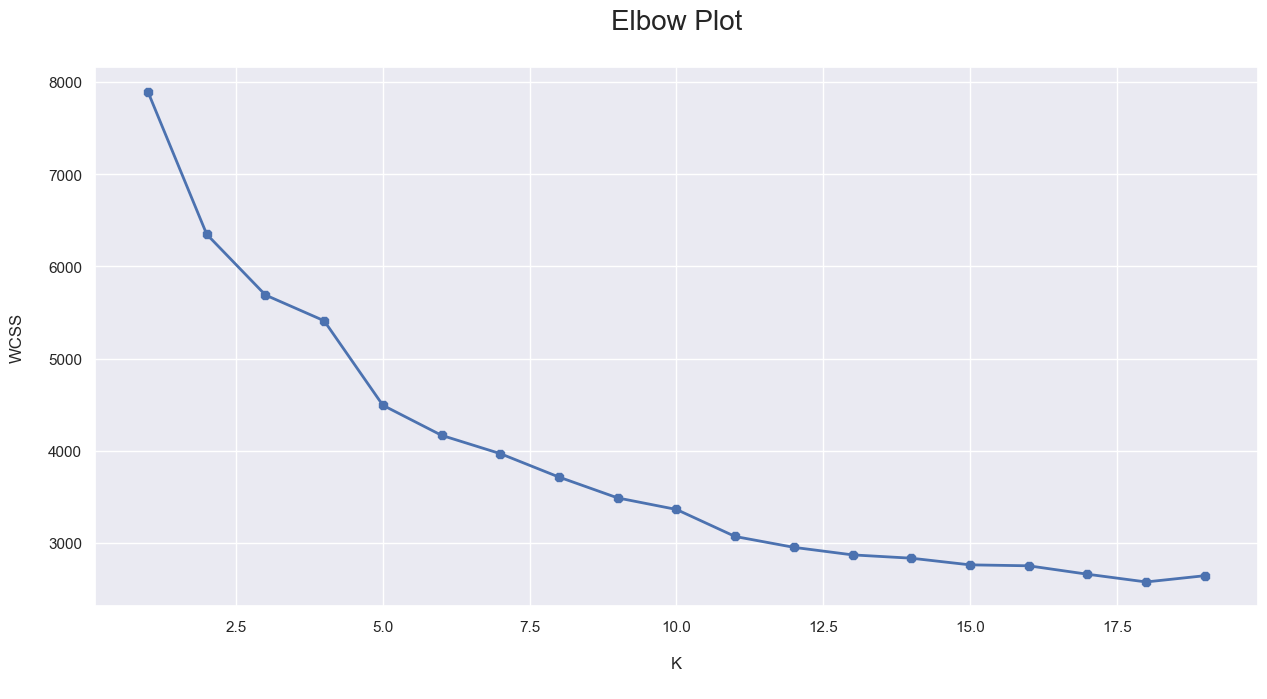

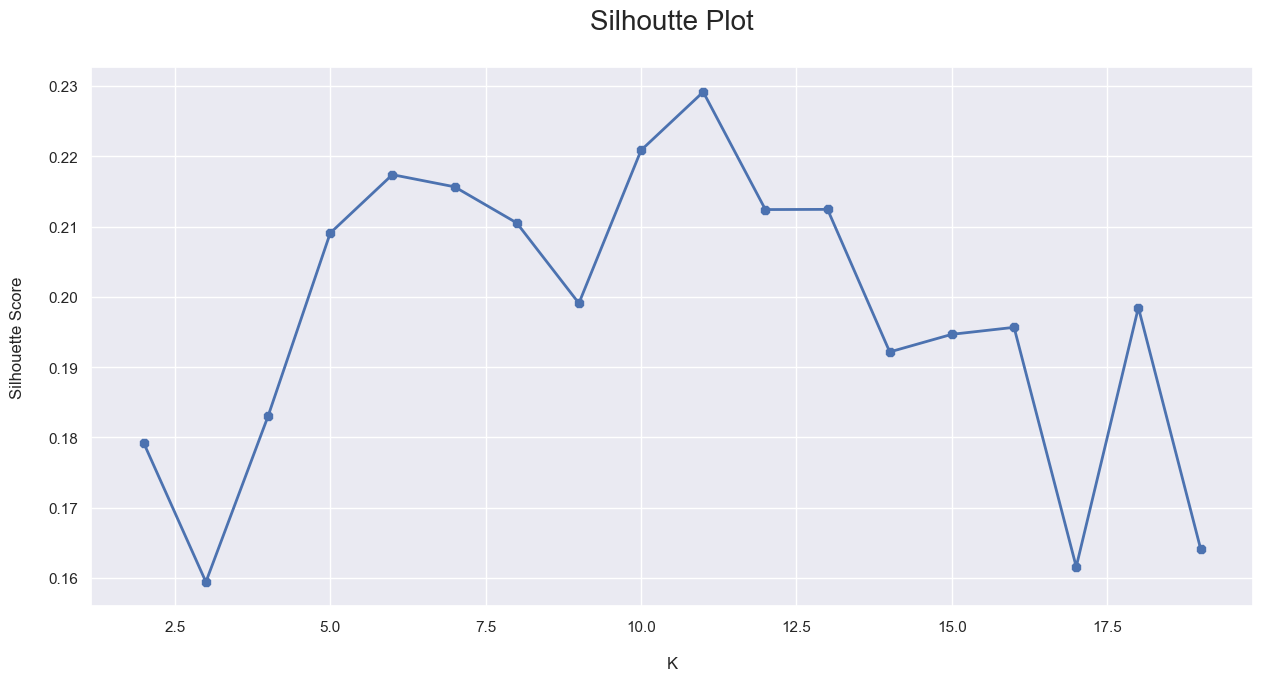

In [99]:
#Create an Elbow Plot of the WCSS (within-cluster-sum-of-squares) with 16 numeric features

X1 =clean_train.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age']].values

wcss = []

for k in range(1,20): #Wider 'k' range for better chance at finding optimal number of clusters
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (15, 7))
sns.set(style="darkgrid")
plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('\nK\n')
plt.ylabel('WCSS\n')
plt.show()

#Create a line plot to visualize the silhouette score
silhouette = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (15, 7))
sns.set(style="darkgrid")
plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('\nK\n')
plt.ylabel('Silhouette Score\n')
plt.show()


### Based on the Elbow and Silhouette Plots, let's try 13 clusters.
___

### random_state will be set to 42 for this model.

### This parameter will be implemented to:

* ###   Avoid inconsistent model performance during this testing phase
>
* ###   Ensure reproducibility of the results. This parameter guarantees the same sequence of random numbers is generated each time the model is run - thus verifying the results/output.
>
* ###   Leave room for possible future comparison as it ensures any models trained with different algorithms will be tested on the *same* data, making comparison straightforward

In [100]:
# Create new Kmeans object with the optimal number of clusters

kmeans = KMeans(n_clusters=13, init = "k-means++", n_init=20, random_state =42)

#Fit the object to the clean_data df

kmeans.fit(X1)

KMeans(n_clusters=13, n_init=20, random_state=42)

In [101]:
# Generate labels for the cleaned numeric dataset

labels = kmeans.fit_predict(X1)
labels

array([12,  6, 11, ...,  3,  3,  3], dtype=int32)

In [102]:
#Add column named "cluster_label" to store labels in the clean_train dataframe
#Add list of categorical variables as columns back into the clean_train dataframe from the raw dataframe

#Load cleaned numeric dataset, drop "Unnamed:0" index error column
train_path = "/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/cleaned_numeric_dataset.csv"
clean_train = pd.read_csv(train_path)
clean_train.drop(clean_train.filter(regex="Unnamed").columns, axis=1, inplace=True)

# Add cluster_label column to contain prediction labels
clean_train["cluster_label"] = labels

# Load raw dataset for categorical columns, drop "Unnamed:0"
raw_test_data = pd.read_csv("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/recommend_test_set.csv")
raw_test = raw_test_data
raw_test.drop(raw_test.filter(regex="Unnamed").columns, axis=1, inplace=True)

# List of song categorical features
cleaned_cat_ids = ['artist_name', 'track_name', 'genre', 'topic']

# Reset index before assignment to avoid index mismatch
clean_train.reset_index(drop=True, inplace=True)
raw_test.reset_index(drop=True, inplace=True)

# Add categorical columns to clean_train
clean_train[cleaned_cat_ids] = raw_test[cleaned_cat_ids]

# Create train_recs dataframe with features AND cluster labels to display song recommendations
train_recs = clean_train[cleaned_cat_ids + ['cluster_label']]

#Print 5 song recommendations from the unscaled KMeans trained algorithm with their cluster assignments
train_recs.head(10)

,artist_name,track_name,genre,topic,cluster_label
0,godsmack,immune,rock,world/life,12
1,dennis brown,second chance,reggae,night/time,6
2,the black crowes,sister luck,pop,violence,11
3,jerry lee lewis,your cheating heart,pop,sadness,0
4,paul anka,eso beso,pop,romantic,0
5,noro morales,silencio,jazz,violence,7
6,rage against the machine,pistol grip pump,rock,obscene,6
7,taste,railway and gun,blues,sadness,6
8,randy travis,messin' with my mind,country,night/time,0
9,paramore,playing god,pop,violence,12


### **Insights from Unscaled Cluster Label Assignments*
* ### Of the 3 Pop songs on the list, the ones about sadness or romance belong to Cluster 0, *but* "Sister Luck" by The Black Crowes, a pop song containing mentions of violence, belongs to Cluster 11.

In [103]:
#Save the updated clean_test dataframe with the cluster_label column as a csv

clean_train.to_csv("LABELS_test_num_df.csv")

In [104]:
#Get the centroids of the clusters

kmeans.cluster_centers_

array([[0.03326463, 0.01974515, 0.05380759, 0.03598931, 0.01514492,
        0.01727249, 0.42037984, 0.08640553, 0.01214891, 0.0349615 ,
        0.0227819 , 0.0621053 , 0.01649354, 0.05279217, 0.03224859,
        0.67272829],
       [0.02097198, 0.05035373, 0.05499208, 0.03654281, 0.01643298,
        0.01339138, 0.03339712, 0.08788062, 0.02107116, 0.02761767,
        0.03496001, 0.04723848, 0.01935442, 0.4249848 , 0.02384507,
        0.23002453],
       [0.01182429, 0.42961953, 0.05392383, 0.03309397, 0.01745946,
        0.01482529, 0.02224246, 0.07591974, 0.0286828 , 0.02466043,
        0.04337909, 0.05301162, 0.02878788, 0.05252663, 0.02305256,
        0.1802354 ],
       [0.01949607, 0.05016527, 0.04043692, 0.02696259, 0.02678757,
        0.01630305, 0.01325358, 0.06817548, 0.46817502, 0.02169669,
        0.06464243, 0.02718787, 0.01511589, 0.02371615, 0.02032872,
        0.15358171],
       [0.01497698, 0.04837556, 0.42089131, 0.03262506, 0.01747317,
        0.01543914, 0.02952971, 

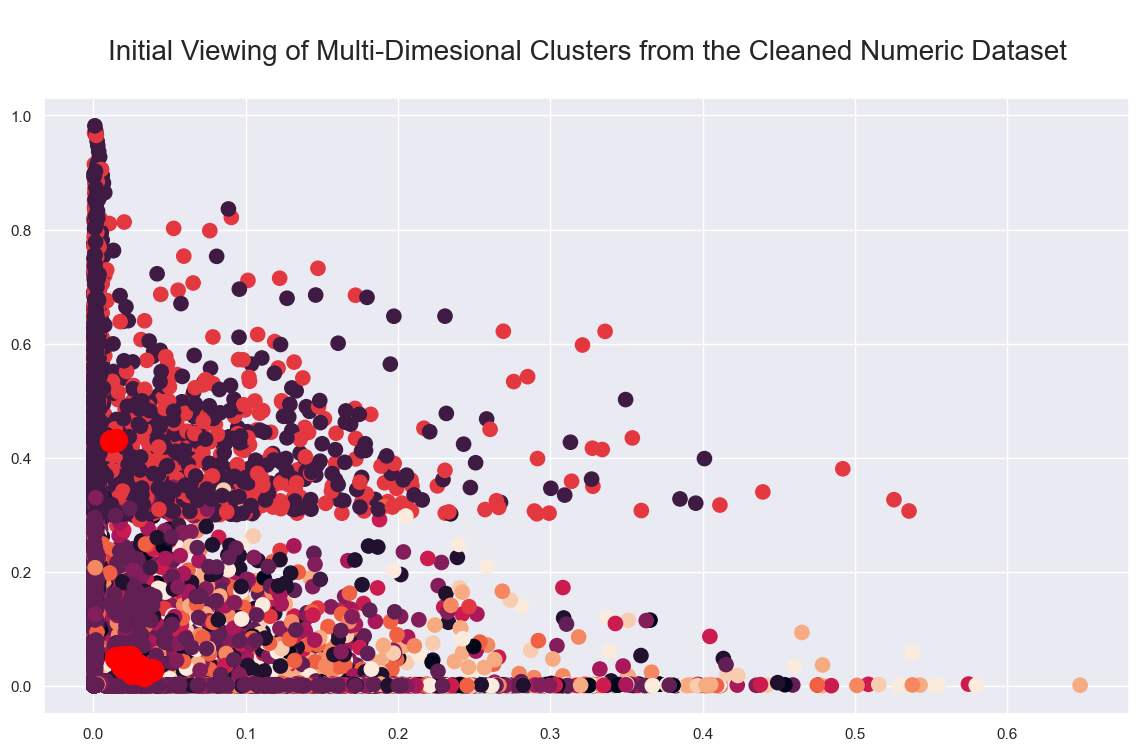

In [105]:
# View inital clusters from the Cleaned Numeric Dataset

plt.figure(figsize = (14, 8))

plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('\nInitial Viewing of Multi-Dimesional Clusters from the Cleaned Numeric Dataset\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

### There are still far too many dimensions for this plot to be understandable. Let's scale the features in the dataset.
___

### **TRAINING: K-Means on 16 Numeric Features *with* Scaling** 
___

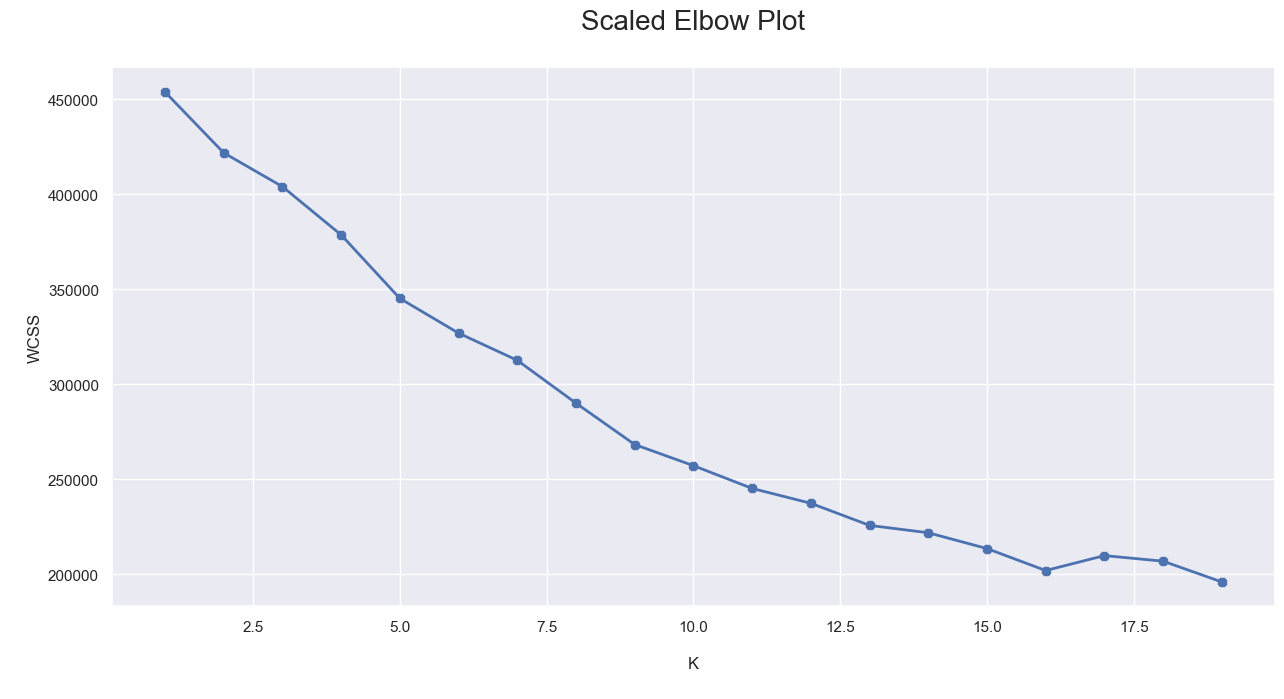

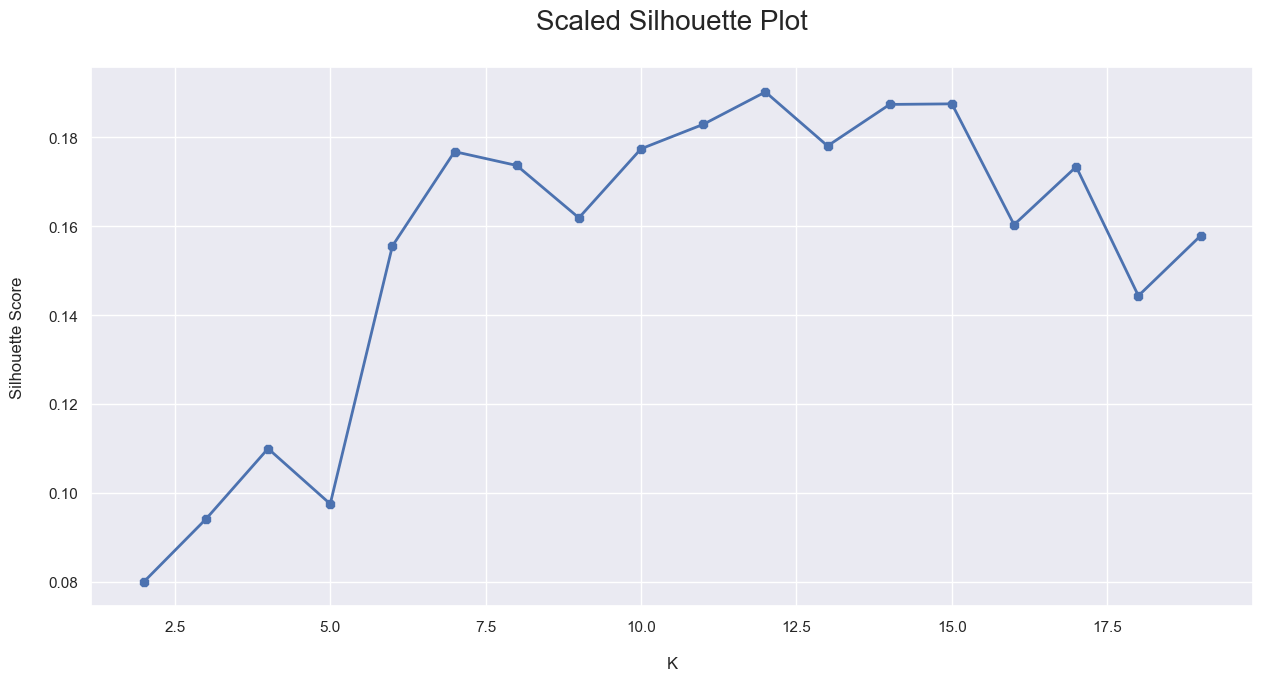

In [106]:
# Create a new scaled KMeans object with 16 clusters. 
# Scaler used to make sure variables have equal range

scaler = StandardScaler()

#fit the scaled KMeans object 
X1_scaled = scaler.fit_transform(X1)

wcss_scaled = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (15, 7))
sns.set(style="darkgrid")
plt.plot(range(1, 20), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Scaled Elbow Plot\n', fontsize = 20)
plt.xlabel('\nK\n')
plt.ylabel('\nWCSS')
plt.show()


# Create plot of the SCALED silhoutte score

silhouette_scaled = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (15, 7))
sns.set(style="darkgrid")
plt.plot(range(2, 20), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Scaled Silhouette Plot\n', fontsize = 20)
plt.xlabel('\nK\n')
plt.ylabel('Silhouette Score\n')
plt.show()

* ### Based on the Elbow and Silhouette Plots - the optimal number of clusters could be between 12 and 17.

In [107]:
# Create a new SCALED KMeans object with 14 clusters then fit the data

kmeans_scaled = KMeans(n_clusters=14, init="k-means++", n_init=20, random_state =42)
kmeans_scaled.fit(X1_scaled)


KMeans(n_clusters=14, n_init=20, random_state=42)

In [108]:
#Labels for scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([6, 2, 7, ..., 1, 1, 1], dtype=int32)

In [109]:
#Get centroids
kmeans_scaled.cluster_centers_

array([[-2.55778320e-02, -5.05263429e-01, -3.04437008e-01,
        -1.57354676e-01, -1.54241240e-01, -9.25570153e-02,
         3.42437799e+00,  5.68581865e-02, -4.57284543e-01,
        -1.69806969e-01, -2.96511342e-01,  3.15632829e-02,
        -1.95052290e-01, -2.93043037e-01, -1.06014339e-01,
         6.29836127e-01],
       [-9.79855106e-02, -3.47690462e-01, -4.45285229e-01,
        -2.73409190e-01,  1.47778512e-02, -1.06164107e-01,
        -3.23484243e-01,  3.96808488e-03,  2.13005718e+00,
        -2.97425755e-01, -3.75712141e-02, -2.86550526e-01,
        -1.97526945e-01, -5.61248148e-01, -1.79517717e-01,
        -4.88983712e-01],
       [-1.78123915e-01, -4.20885309e-01,  1.89357927e+00,
        -2.04263197e-01, -1.73058380e-01, -1.65666879e-01,
        -1.46061853e-01,  1.72117973e-01, -4.07660693e-01,
        -2.48363989e-01, -2.42749109e-01, -1.56584226e-01,
        -1.19301578e-01, -3.14267337e-01, -8.32214101e-02,
         6.68419693e-02],
       [-2.84088775e-01,  1.09106325e

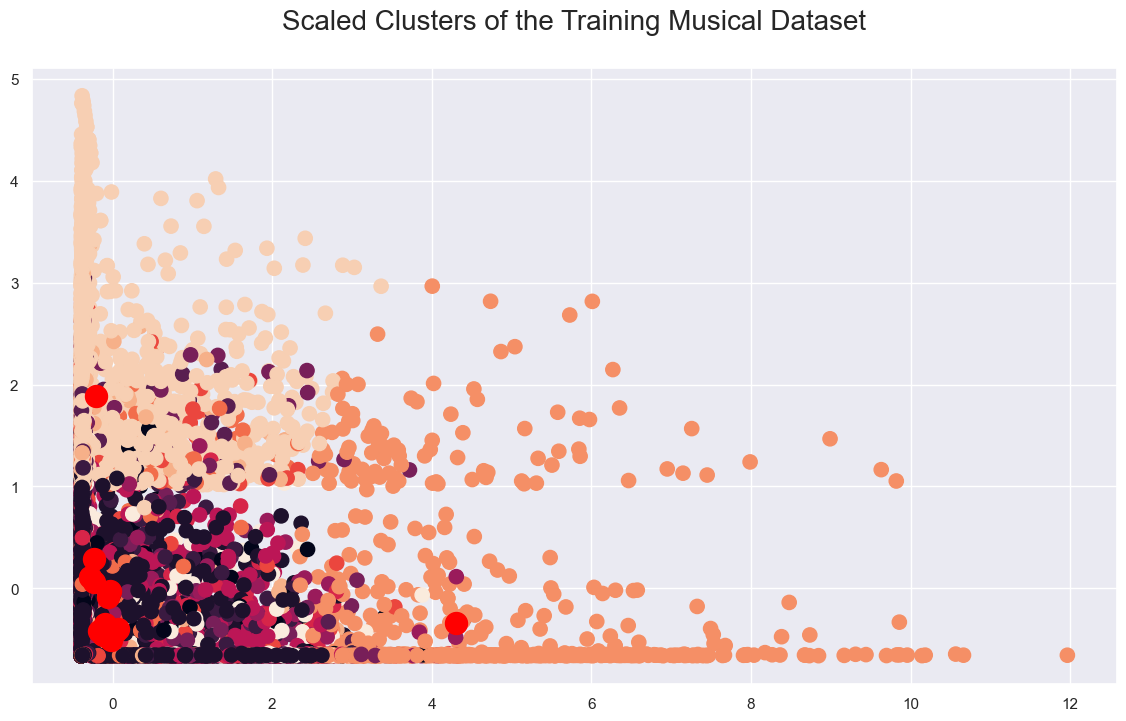

In [110]:
#Visualize scaled clusters as a scatter plot for model training
plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Scaled Clusters of the Training Musical Dataset\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

### There are still too many features present resulting in the unreadable 2D chart above. 

### Let's reduce the dimensionality of the scaled test dataset using PCA

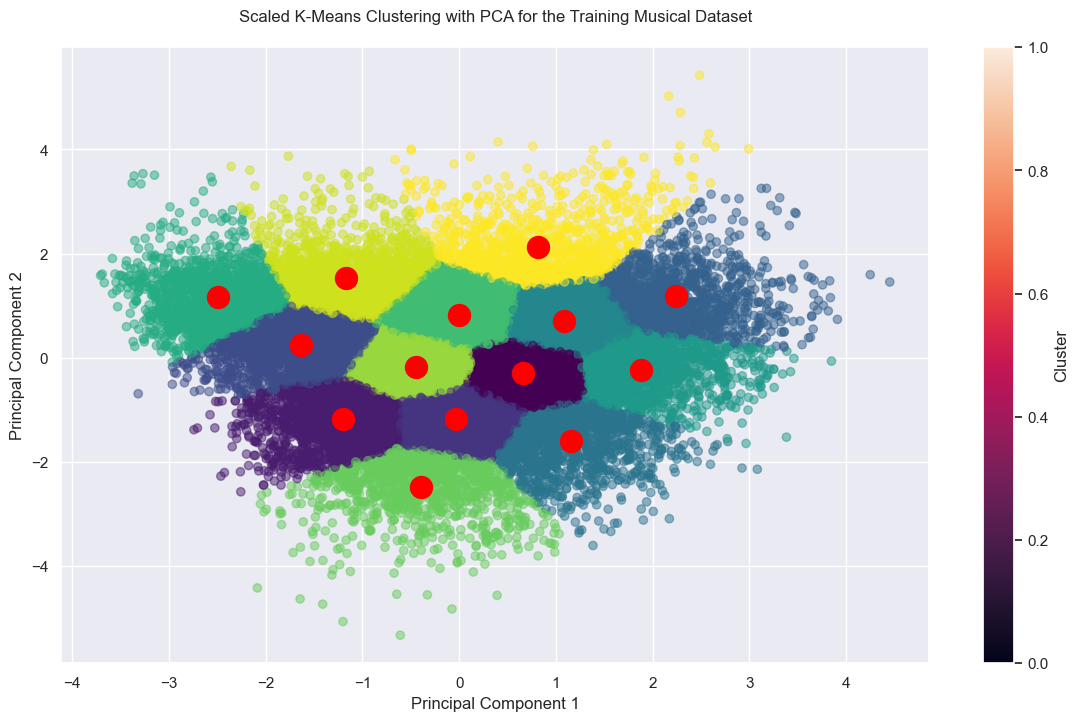

In [111]:
from sklearn.decomposition import PCA

#set PCA components, standardize data in order to train the model with the cleaned numeric dataset
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(X1_scaled)

#set up parameters for prediction
kmeans_scaled = KMeans(n_clusters=14, random_state=42)
clusters = kmeans_scaled.fit_predict(transformed_pca)


#plot PCA results as a scatterplot
plt.figure(figsize=(14, 8))
plt.scatter(transformed_pca[:,0], transformed_pca[:,1], c=clusters, cmap="viridis", alpha=0.5 )
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title("Scaled K-Means Clustering with PCA for the Training Musical Dataset\n")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

### These results show that the K-Means Clustering Model with PCA works and is able to sort different songs.

In [112]:
#Read the cleaned numeric dataset csv into a dataframe again
train_path = ("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/cleaned_numeric_dataset.csv")
scaled_clean_train = pd.read_csv(train_path)
scaled_clean_train.drop(scaled_clean_train.filter(regex="Unnamed").columns, axis=1, inplace=True)

# Add cluster_label column to contain scaled prediction labels
scaled_clean_train ["cluster_label"] = labels

#load raw test dataset again
raw_test_data = pd.read_csv("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/recommend_test_set.csv")
raw_test= (raw_test_data)
raw_test.drop(raw_test.filter(regex="Unnamed").columns, axis=1, inplace=True)

#List of categorical identifers to be moved back to the cleaned numeric dataset
cleaned_cat_ids = ['artist_name', 'track_name', 'genre', 'topic']

# Reset index before assignment to avoid index mismatch
scaled_clean_train.reset_index(drop=True, inplace=True)
raw_test.reset_index(drop=True, inplace=True)

#add categorical columns to cleaned numeric dataset
scaled_clean_train[cleaned_cat_ids] = raw_test[cleaned_cat_ids]

#Store song recommendation in new dataframe called scaled_train_recs
scaled_train_recs = clean_train[cleaned_cat_ids]

# Create scaled_train_recs dataframe with features AND cluster labels to display song recommendations
scaled_train_recs = scaled_clean_train[cleaned_cat_ids + ['cluster_label']]

#Share song recommendations from the Scaled Trained KMeans Clustering Model
print("Here are your Scaled K-Means with PCA based Song Recommendations from the Training Dataset\n")
scaled_train_recs.head(10)

Here are your Scaled K-Means with PCA based Song Recommendations from the Training Dataset



,artist_name,track_name,genre,topic,cluster_label
0,godsmack,immune,rock,world/life,6
1,dennis brown,second chance,reggae,night/time,2
2,the black crowes,sister luck,pop,violence,7
3,jerry lee lewis,your cheating heart,pop,sadness,0
4,paul anka,eso beso,pop,romantic,0
5,noro morales,silencio,jazz,violence,12
6,rage against the machine,pistol grip pump,rock,obscene,2
7,taste,railway and gun,blues,sadness,3
8,randy travis,messin' with my mind,country,night/time,0
9,paramore,playing god,pop,violence,6


### *Insights from the Scaled KMeans Model with PCA Results*
* ### Though the songs from Cluster 0 have different genres and dominating topics, upon listening to each - they are all songs dealing with romantic realtionships in different situations.
* ### The Clutser 6 songs are classified as Rock & Pop in the output. Without listening to both, that may not make sense BUT the band Paramore falls into the Pop Rock genre in reality. The Scaled KMeans Clustering Model was able to catch that nuance and more.
* ### Most of the songs from this recommendation are Pop (4/10) which tracks with what was found in the EDA

___

# New Sample Prediction

#### Applying the K-Means Clustering algorithm 
___

In [113]:
#Load cleaned recommendation test dataset, remove Unnamed:0 column again, verify

test_data = pd.read_csv("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/rec_test_clean_set.csv")

#Remove "Unnamed:0" column from raw dataframe
test_data.drop(test_data.filter(regex="Unnamed").columns, axis=1, inplace=True)

#Verify "Unnamed:0" column removal
test_data.head()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286
1,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714
2,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571
3,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143
4,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429


### The amount of clusters will equal 4 as there are only 10 samples in our Test Recommendation Dataset

In [120]:
# Create new Kmeans object for testing our model
kmeans = KMeans(n_clusters=4, init = "k-means++", n_init=20, random_state =42)

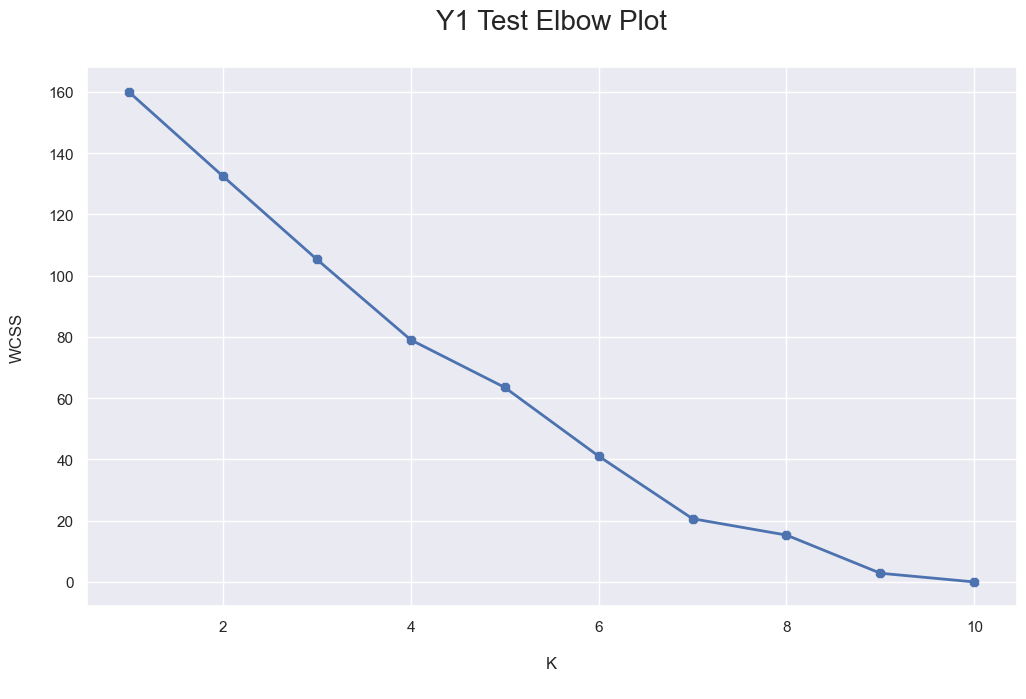

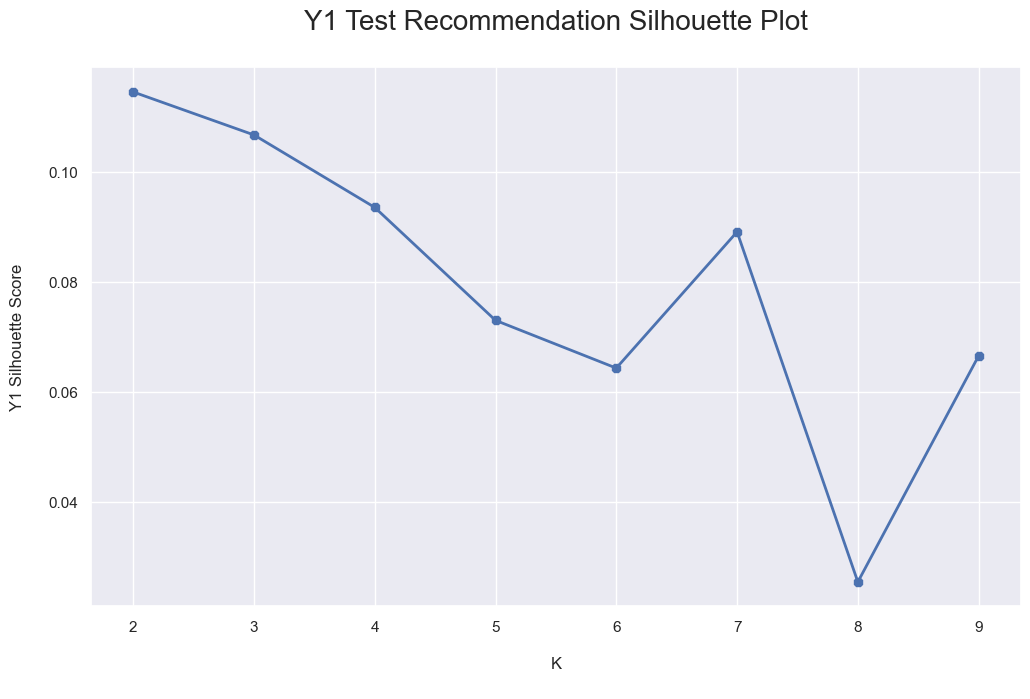

In [115]:
#Store test data in Y1 (training data in X1)
Y1 = test_data

# Create new Kmeans object 
#kmeans = KMeans(n_clusters=4, init = "k-means++", n_init=20, random_state =42)

#scaler 
scaler = StandardScaler()

#fit the KMeans object to test
Y1_scaled = scaler.fit_transform(Y1)
wcss_scaled = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Y1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Y1 Test Elbow Plot\n', fontsize = 20)
plt.xlabel('\nK\n')
plt.ylabel('WCSS\n')
plt.show()


# create a plot of silhoutte score for test

silhouette_scaled = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    predictions = kmeans.fit_predict(Y1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(Y1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 10), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Y1 Test Recommendation Silhouette Plot\n', fontsize = 20)
plt.xlabel('\nK\n')
plt.ylabel('Y1 Silhouette Score\n')
plt.show()

### The Sample Recommendation data must be scaled to follow how the Training Data from the Scaled KMeans Clustering Training model data was processed before predicitions were calculated

In [121]:
#Labels for Y1 (test) scaled data
labels = kmeans_scaled.fit_predict(Y1_scaled)
labels

array([1, 2, 1, 0, 2, 3, 1, 2, 2, 1], dtype=int32)

In [122]:
#Get Y1 Test scaled centroids
kmeans_scaled.cluster_centers_

array([[ 2.90704564, -0.81607288, -0.77891436, -0.10240565, -0.39422551,
        -0.45973356, -0.37905488, -0.89108214, -0.32501032, -0.11662054,
         2.38617559, -0.4014732 , -0.37821548,  2.4041733 , -0.53265843,
         1.23450178],
       [-0.41901154,  0.66941771,  0.58337508, -0.30184562,  0.47788359,
         0.32582539, -0.37017764, -0.70155101,  0.49755512,  0.42901392,
        -0.86302805, -0.21451204, -0.19541478, -0.35846267,  0.42584408,
        -0.92863192],
       [-0.20547935, -0.78969691, -0.49958184,  0.55761358, -0.27684367,
        -0.08821364,  0.56133038,  0.8118181 , -0.33315315, -0.32269919,
         0.18312429,  0.41801838, -0.42662005, -0.09514956, -0.29498515,
         0.20115766],
       [-0.40908209,  1.2971897 ,  0.4437414 , -0.92066618, -0.40993416,
        -0.49071343, -0.38555608,  0.4500138 , -0.33259756, -0.30863836,
         0.33343945, -0.41255216,  2.86635482, -0.58972439,  0.0092227 ,
         1.67539528]])

In [123]:
from sklearn.decomposition import PCA


# KMeans scaled sample recommendation data
kmeans_scaled = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_scaled.fit_predict(Y1_scaled)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(Y1_scaled)


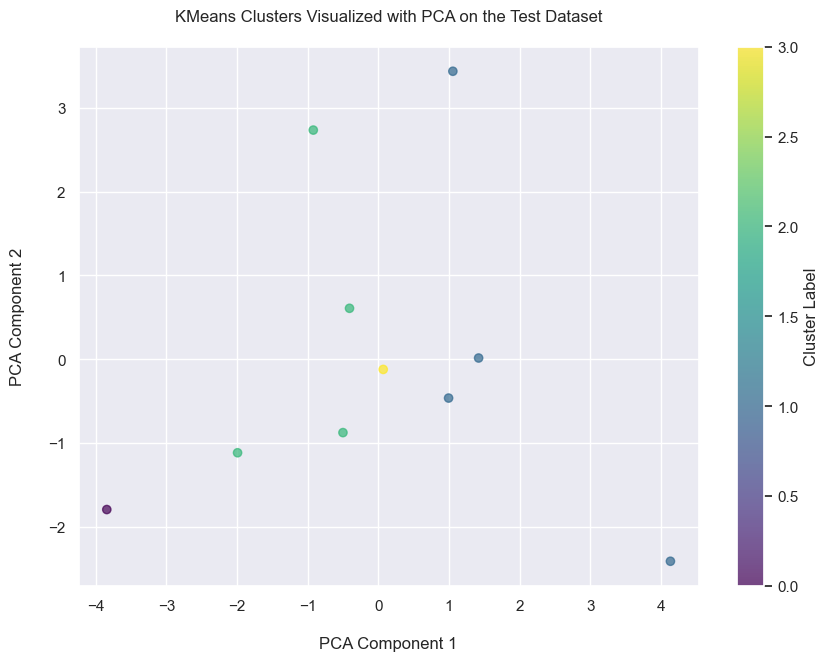

In [124]:
# Create a scatter plot of the two PCA components, colored by cluster labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(transformed_pca[:, 0], transformed_pca[:, 1], 
                      c=clusters, cmap='viridis', alpha=0.7)

# Add labels and title to KMeans scatterplot for the test dataset with PCA
plt.xlabel('\nPCA Component 1')
plt.ylabel('PCA Component 2\n')
plt.title('KMeans Clusters Visualized with PCA on the Test Dataset\n')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

In [125]:
#Load cleaned recommendation dataset, drop "Unnamed:0" index error column
sample_path = ("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/rec_test_clean_set.csv")
clean_sample = pd.read_csv(sample_path)
clean_sample.drop(clean_sample.filter(regex="Unnamed").columns, axis=1, inplace=True)

# Add cluster_label column to contain prediction labels
clean_sample["cluster_label"] = labels

#load raw test dataset 
raw_test_data = pd.read_csv("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/recommend_test_set.csv")
raw_test= (raw_test_data)
raw_test.drop(raw_test.filter(regex="Unnamed").columns, axis=1, inplace=True)

#List of categorical identifers to be moved back to the cleaned sample dataset testing the model
testdf_cat_ids = ['artist_name', 'track_name', 'genre', 'topic']

# Reset index before assignment to avoid index mismatch, or missing columns
clean_sample.reset_index(drop=True, inplace=True)
raw_test.reset_index(drop=True, inplace=True)

#add categorical columns to cleaned recommendation numeric dataset
clean_sample[testdf_cat_ids] = raw_test[testdf_cat_ids]

# Create train_recs dataframe with features AND cluster labels to display song recommendations
sample_recs = clean_sample[testdf_cat_ids + ["cluster_label"]]


#Share song recommendations from the sample recommendation dataset 

print("Here are your K-Means with PCA based Song Recommendations with their PCA Clusters\n")
sample_recs.head(10)

Here are your K-Means with PCA based Song Recommendations with their PCA Clusters



,artist_name,track_name,genre,topic,cluster_label
0,godsmack,immune,rock,world/life,1
1,dennis brown,second chance,reggae,night/time,2
2,the black crowes,sister luck,pop,violence,1
3,jerry lee lewis,your cheating heart,pop,sadness,0
4,paul anka,eso beso,pop,romantic,2
5,noro morales,silencio,jazz,violence,3
6,rage against the machine,pistol grip pump,rock,obscene,1
7,taste,railway and gun,blues,sadness,2
8,randy travis,messin' with my mind,country,night/time,2
9,paramore,playing god,pop,violence,1


___
### **Sample Prediction Results Overview and Analysis** 

* ### The sample recommendation data was scaled because the training data was scaled before predicting
* ### There are 4 clusters instead of 8 because the vastly smaller size of the test dataset. A larger scaled dataset similar to the raw one in this project would more than likely use the optimal cluster number of 13
* ### With 4 clusters, we see that more similar songs are being grouped together.
    * ### Playing God by Paramore, Immune by Godsmack, Sister Luck by The Black Crowes, and Pistol Grip by Rage Against the Machine are all classified as Cluster 1